In [1]:
import numpy as np, random, operator, pandas as pd, geopy.distance
import matplotlib.pyplot as plt


In [2]:
def create_starting_population(size,Number_of_city):
    '''Method create starting population 
    size= No. of the city
    Number_of_city= Total No. of the city
    '''
    population = []
    
    for i in range(0,size):
        population.append(create_new_member(Number_of_city))
        
    return population

In [3]:
def pick_mate(N):
    '''mates are randomaly picked 
    N= no. of city '''
    i=random.randint(0,N)    
    return i

In [4]:
def distance(i,j):
    '''
    Method calculate distance between two cities if coordinates are passed
    i=(x,y) coordinates of first city
    j=(x,y) coordinates of second city
    '''
    #returning distance of city i and j 
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
    

In [5]:
def score_population(population, CityList):  
    '''
    Score of the whole population is calculated here
    population= 2 dimensional array conating all the routes
    Citylist= List of the city 
    '''
    scores = []
  
    for i in population:
        #print(i)
        scores.append(fitness(i, CityList))
        #print([fitness(i, the_map)])
    return scores

In [6]:
def fitness(route,CityList):
    '''Individual fitness of the routes is calculated here
    route= 1d array
    CityList = List of the cities
    '''
    #Calculate the fitness and return it.
    score=0
    #N_=len(route)
    for i in range(1,len(route)):
        k=int(route[i-1])
        l=int(route[i])

        score = score + distance(CityList[k],CityList[l])
        
        
    return score

In [7]:
def create_new_member(Number_of_city):
    '''
    creating new member of the population
    '''
    pop=set(np.arange(Number_of_city,dtype=int))
    route=list(random.sample(pop,Number_of_city))
            
    return route

In [8]:
def crossover(a,b):
    '''
    cross over 
    a=route1
    b=route2
    return child
    '''
    child=[]
    childA=[]
    childB=[]
    
    
    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(a))
    
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    
    for i in range(start_gene,end_gene):
        childA.append(a[i])
        
    childB=[item for item in a if item not in childA]
    child=childA+childB
    
    
    
       
    return child


In [9]:
def mutate(route,probablity):
    '''
    mutation 
    route= 1d array
    probablity= mutation probablity
    '''
    #for mutating shuffling of the nodes is used
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))
            
            temp1=route[swaping_p]
            
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    
    return route
    
    
    

In [10]:
def selection(popRanked, eliteSize):
    selectionResults=[]
    result=[]
    for i in popRanked:
        result.append(i[0])
    for i in range(0,eliteSize):
        selectionResults.append(result[i])
    
    return selectionResults

In [11]:
def rankRoutes(population,City_List):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],City_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

In [12]:
def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

In [13]:
def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

In [14]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [15]:
def next_generation(City_List,current_population,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,City_List)
    
    #print(f"population rank : {population_rank}")
    
    selection_result=selection(population_rank,elite_size)
    #print(f"selection results {selection_result}")
    
    mating_pool=matingPool(current_population,selection_result)
    #print(f"mating pool {mating_pool}")
    
    children=breedPopulation(mating_pool)
    #print(f"childern {children}")
    
    next_generation=mutatePopulation(children,mutation_rate)
    #print(f"next_generation {next_generation}")
    return next_generation

In [16]:
def genetic_algorithm(City_List,size_population=1000,elite_size=75,mutation_Rate=0.01,generation=2000):
    '''size_population = 1000(default) Size of population
        elite_size = 75 (default) No. of best route to choose
        mutation_Rate = 0.05 (default) probablity of Mutation rate [0,1]
        generation = 2000 (default) No. of generation  
    '''
    pop=[]
    progress = []
    
    Number_of_cities=len(City_List)
    
    population=create_starting_population(size_population,Number_of_cities)
    progress.append(rankRoutes(population,City_List)[0][1])
    print(f"initial route distance {progress[0]}")
    print(f"initial route {population[0]}")
    for i in range(0,generation):
        pop = next_generation(City_List,population,mutation_Rate,elite_size)
        progress.append(rankRoutes(pop,City_List)[0][1])
    
    
    rank_=rankRoutes(pop,City_List)[0]
    
    print(f"Best Route :{pop[rank_[0]]} ")
    print(f"best route distance {rank_[1]}")
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return rank_, pop
    
        

In [28]:
cityList = []


for i in range(0,4):
    x=int(random.random() * 200)
    y=int(random.random() * 200)
    cityList.append((x,y))

In [29]:
cityList

[(166, 119), (181, 141), (172, 9), (126, 4)]

C:\Users\ASUS\AppData\Local\Temp/ipykernel_6624/2841693681.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  route=list(random.sample(pop,Number_of_city))


initial route distance 183.06150994778906
initial route [1, 0, 3, 2]
Best Route :[3 2 0 1] 
best route distance 183.06150994778906


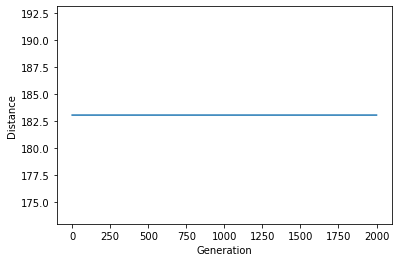

In [30]:
rank_,pop=genetic_algorithm(City_List=cityList)

In [20]:
x_axis=[]
y_axis=[]
for i in cityList:
    x_axis.append(i[0])
    y_axis.append(i[1])

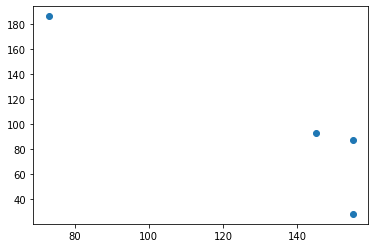

In [21]:
plt.scatter(x_axis,y_axis)
plt.show()